In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import sys

Using TensorFlow backend.


In [2]:
stock=pd.read_csv('yahoostock.csv')
df=pd.DataFrame(stock)
df.drop(df.columns[[0,1,4,6,7]], axis=1, inplace=True) 
aa=df.iloc[:100,]
df.dtypes


Open     float64
High     float64
Close    float64
dtype: object

In [3]:
count=0
original=0

In [4]:
def load_data(stock, seq_len):
    check=stock[::-1]
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    sa=round( result.shape[0])
    sz=int(sa)-100
    row = round(0.9 * result.shape[0])
    asd=result[int(sz):int(sa),:]
    train = result[:int(row), :]
    tpre=asd[:,:-1]
    tout=result[int(sz):,-1][:,-1]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
    tpre= np.reshape(tpre,(tpre.shape[0],tpre.shape[1],amount_of_features))
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test,tpre,tout]


In [5]:
def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [6]:

window = 5
X_train, y_train, X_test, y_test,tpre,tout = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print("qw", tpre.shape)
print("qw", tout.shape)



X_train (4529, 5, 3)
y_train (4529,)
X_test (503, 5, 3)
y_test (503,)
qw (100, 5, 3)
qw (100,)


C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [7]:
model = build_model2([3,window,1])

C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  
C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':


In [8]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.1,
    verbose=0)

C:\Users\admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


In [9]:

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 35.55 MSE (5.96 RMSE)
Test Score: 5.63 MSE (2.37 RMSE)


In [10]:
diff=[]
ratio=[]
p=model.predict(tpre)
for u in range(len(tout)):
    pr = p[u][0]
    ratio.append((tout[u]/pr)-1)
    diff.append(abs(tout[u]- pr))

In [11]:
for i in range(len(p)):
    if (p[i]>tout[i]):
        count=((p[i]-tout[i])/tout[i])
        original=original+count
    if (p[i]<tout[i]):
        count=((tout[i]-p[i])/tout[i])
        original=original+count

       
t=100-((original/len(p))*100)
print("Accuracy",t)

Accuracy [94.54724]


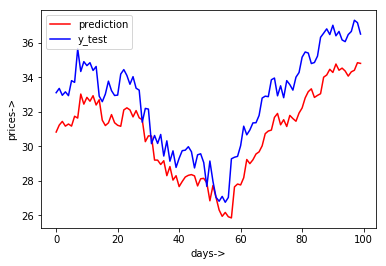

In [12]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(tout,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.xlabel('days->')
plt2.ylabel('prices->')
plt2.show()
